## **Analysis of highly active inhibitors**

In this notebook, We displayed the chemical scaffolds of Bemis and Murcko on 217 active compounds against the S. aureus dataset (STADS). The top 25% most active compounds against *S. aureus* FabI were selected from the 217 compounds in the STADS, based on the third quartile (Q3) of the pIC<sub>50</sub> value distribution. 

This section was adapted by Alberto Marban from https://difacquim.gitbook.io/quimioinformatica

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True) #Para visualizar moléculas

In [2]:
df = pd.read_csv('STADS.csv')
df.head(1)

,Structure of NEW_SMILES [idcode],NEW_SMILES,pIC50,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,...,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,Shape Index,Molecular Flexibility,Molecular Complexity
0,fcoH`@DZSdBtfYgV[eWyVU[tQsZhHIJj`hF@@@,CC(=O)N(C)Cc1cc(C(=O)N(C)Cc2cc3ccccc3n2C)ccc1N,5.173925,378.476,6,2,5,1,4,28,...,5.131905,3.275526,-3.28,19.480717,7.760914,3.856356,5.399577,0.53571,0.60672,0.78413


In [3]:
print(len(df))

217


In [4]:
#Statistics
df.describe()

,pIC50,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,Shape Index,Molecular Flexibility,Molecular Complexity
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,6.015879,361.458922,4.857143,0.617512,4.211982,0.580645,3.801843,26.055300,45.451613,5.635945,...,4.526053,3.088661,-2.834977,17.236750,7.344646,3.861248,4.897474,0.616267,0.432178,0.772149
std,0.889312,56.623357,1.675769,0.869369,1.462888,0.813198,1.159660,4.375509,8.660720,1.459705,...,1.223114,0.970260,0.648223,2.762798,1.301717,1.399390,1.139642,0.069091,0.081643,0.081096
min,4.028260,232.254000,2.000000,0.000000,2.000000,0.000000,1.000000,17.000000,24.000000,2.000000,...,2.034826,1.253276,-4.990000,11.045231,4.661412,2.107032,2.860354,0.343750,0.228600,0.313890
25%,5.343902,322.412000,4.000000,0.000000,3.000000,0.000000,3.000000,23.000000,39.000000,5.000000,...,3.493064,2.222111,-3.280000,15.734563,6.589177,3.249800,4.332233,0.566670,0.388470,0.732840
50%,6.000000,363.196000,5.000000,0.000000,4.000000,0.000000,4.000000,26.000000,46.000000,6.000000,...,4.492958,3.009625,-2.880000,17.308745,7.379773,3.766740,4.862657,0.620690,0.436880,0.768560
75%,6.616185,398.466000,6.000000,1.000000,5.000000,1.000000,4.000000,30.000000,52.000000,6.000000,...,5.658371,3.840271,-2.430000,18.664269,7.817687,4.155212,5.200545,0.666670,0.497960,0.831860
max,8.096910,492.620000,10.000000,4.000000,13.000000,4.000000,10.000000,36.000000,72.000000,10.000000,...,7.414083,5.505983,-0.790000,25.821616,13.637256,17.210000,13.070234,0.894740,0.614110,1.001500


In [5]:
# Filter the DataFrame to retain only entries with pIC50 values greater than or equal to 6.6
df = df[df['pIC50'] >= 6.6]

# Display the number of entries in the filtered DataFrame
print(len(df))

59


,Structure of NEW_SMILES [idcode],NEW_SMILES,pIC50,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,...,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,Shape Index,Molecular Flexibility,Molecular Complexity,ROMol
19,fdy@a@IJAHNdDfYU_f]g@q`HJhH@@@@,CCc1cc(O)c(Oc2ccccc2F)cc1F,8.096910,250.244,2,1,3,1,2,18,...,1.585495,-2.10,12.359368,5.039879,2.422575,3.460540,0.61111,0.47020,0.68511,
20,fbu`a@CDlBPcHYEEDdeLhbefB|FBBHN@j@@@,CCc1cc(O)c(Oc2ccc(C#N)cc2F)cc1F,7.508638,275.254,3,1,3,1,3,20,...,1.711149,-2.61,13.813191,5.574134,2.694610,3.849829,0.65000,0.48096,0.70798,
26,ek`RD@@DFON`GDfUm]VyyfUzNIEJnecffiYijiB`bh@@@,Cc1c(CN(C)C(=O)CC=c2cnc3c(c2)CCC(=O)N=3)c2cccc...,7.221849,388.471,6,0,4,0,4,29,...,3.818734,-3.28,19.054564,7.621059,3.700778,5.007447,0.58621,0.51640,0.85910,
33,egdTDH@IGAK`HaIe]nUnUUg_hXl|BRZfvN`@fjijH@@H`@@@,O=C(c1ccc(Cl)cc1)N1CCc2c(n(Cc3ccc(O)cc3)c3cccc...,6.744727,416.908,4,1,3,1,3,30,...,4.307227,-3.24,18.767446,7.541802,3.332958,4.718012,0.53333,0.39188,0.86986,
36,eolTLH@EOFIG`HcHhdhUMDeMDddhlmjNG@hlneckh@bZjf...,O=C(c1ccc(Cl)cc1O)N1CCc2c(n(Cc3ccc(O)cc3)c3ccc...,6.795880,432.907,5,2,3,2,4,31,...,4.388176,-3.44,19.519171,7.671249,3.509987,4.830207,0.51613,0.39979,0.88315,
38,fmoq`@DL|AvTfUm]VyuYVgIJbfZvfiYijj`@j@@@,O=C1CCc2cc(=CCC(=O)N3CC(OCc4ccccc4)C3)cnc2=N1,7.301030,363.417,6,0,5,0,4,27,...,3.203246,-2.86,17.548673,7.797533,4.282556,5.068013,0.70370,0.48693,0.76856,
44,fcq`@DL|AqTfUm]VyuYeirRhiWmijVZZjhBBh@@,Cc1ccccc1OCC1CN(C(=O)CC=c2cnc3c(c2)CCC(=O)N=3)C1,6.752027,377.444,6,0,5,0,4,28,...,3.472666,-3.02,18.348281,7.922526,4.108969,5.191597,0.67857,0.45908,0.77872,
49,ekh\L@@DFO@GBdfUm]VyvVWZNIEHdfnmcffiYijjZ`Bh@@@,Cc1c(C2CN(C(=O)CC=c3cnc4c(c3)CCC(=O)N=4)C2)oc2...,6.850781,387.439,6,0,3,0,4,29,...,4.098490,-3.28,17.793865,6.954633,3.243792,4.267235,0.62069,0.43187,0.84517,
50,egd\LH@GFea@k`HaIe[[yvueUWhXDdl\zFvN`@ijjZZVfd...,Cc1c(C2CN(C(=O)CC=c3cnc4c(c3)CCC(=O)N=4)C2)oc2...,6.690370,421.884,6,0,3,0,4,30,...,4.117305,-2.99,19.002107,7.361855,3.411440,4.663025,0.63333,0.43232,0.85945,
51,egdRD@@DFOB`GDfUm]VyvUe^cbQRIKhXzyijVZZj@@`J`@@@,Cc1cc(C2CN(C(=O)CC=c3cnc4c(c3)CCC(=O)N=4)C2)nc...,6.616185,398.466,6,0,3,0,4,30,...,4.121693,-3.41,18.608011,7.444716,3.493048,4.617712,0.63333,0.42080,0.83644,

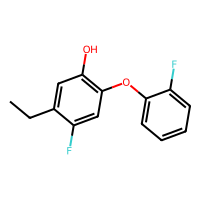
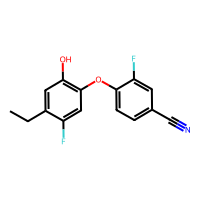
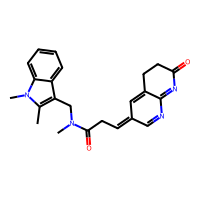
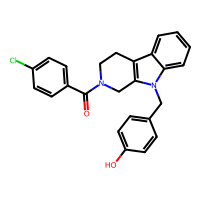
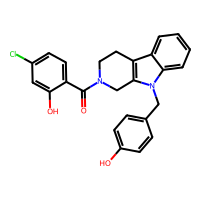
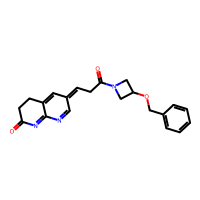
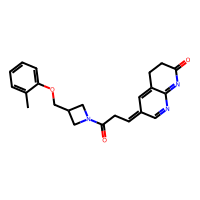
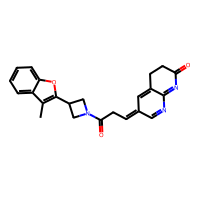
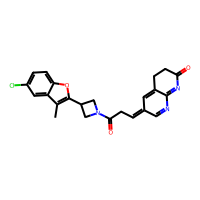
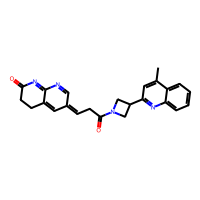

In [6]:
# Add a new column of molecule objects to the DataFrame from 'NEW_SMILES' strings
PandasTools.AddMoleculeColumnToFrame(df, 'NEW_SMILES')

# Display rows from index 10 to 19 of the DataFrame
df[10:20]

In [7]:
# Add a column with Murcko scaffolds to the DataFrame from the 'ROMol' molecule column
PandasTools.AddMurckoToFrame(df, "ROMol")

# Select and display the columns 'NEW_SMILES' and 'Murcko_SMILES' from the DataFrame
df[['NEW_SMILES', 'Murcko_SMILES']]

,NEW_SMILES,Murcko_SMILES
6,Cc1c(CN(C)C(=O)CC=c2cnc3c(c2)CCC(=O)N=3)oc2ccc...,O=C1CCc2cc(=CCC(=O)NCc3cc4ccccc4o3)cnc2=N1
9,CCc1ccc(Oc2ccc(C(=O)CCCO)cc2)c(O)c1,c1ccc(Oc2ccccc2)cc1
11,CCc1cc(O)c(Oc2ccc(C(N)=O)cc2F)cc1F,c1ccc(Oc2ccccc2)cc1
12,CCc1cc(O)c(Oc2ccc(C(=O)NC)cc2F)cc1F,c1ccc(Oc2ccccc2)cc1
13,CCc1ccc(Oc2ccc(C(=O)N3CCNC(=O)C3)cc2F)c(O)c1,O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1
14,CCc1cc(O)c(Oc2ccc(C(=O)N3CCNC(=O)C3)cc2F)cc1F,O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1
15,CCc1cc(O)c(Oc2ccc(C(=O)O)cc2F)cc1F,c1ccc(Oc2ccccc2)cc1
16,CCc1cc(O)c(Oc2ccc[nH]c2=N)cc1F,N=c1[nH]cccc1Oc1ccccc1
17,CCc1cc(O)c(Oc2cccnc2F)cc1F,c1ccc(Oc2cccnc2)cc1
18,CCc1cc(O)c(Oc2ccccc2)cc1F,c1ccc(Oc2ccccc2)cc1


,Structure of NEW_SMILES [idcode],NEW_SMILES,pIC50,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,...,kappa1,kappa2,kappa3,Phi,Shape Index,Molecular Flexibility,Molecular Complexity,ROMol,Murcko_SMILES,scaffold
6,fcq`@DL|AvTfUm]VyyY]irRjmWmijVZZjZ`B`@@,Cc1c(CN(C)C(=O)CC=c2cnc3c(c2)CCC(=O)N=3)oc2ccc...,7.537602,375.428,6,0,4,0,4,28,...,18.100534,7.384410,3.579611,4.773634,0.60714,0.51384,0.83603,,O=C1CCc2cc(=CCC(=O)NCc3cc4ccccc4o3)cnc2=N1,
9,ff}@P@@ZLEIfUW]f_QJSehHHjB@h@@@,CCc1ccc(Oc2ccc(C(=O)CCCO)cc2)c(O)c1,7.318759,300.354,4,2,7,2,4,22,...,16.047672,7.613759,4.085075,5.553777,0.72727,0.57120,0.62421,,c1ccc(Oc2ccccc2)cc1,
11,fjmaa@KDLxD`fPrJJIIJZJJiY``q``bAhBh@@@,CCc1cc(O)c(Oc2ccc(C(N)=O)cc2F)cc1F,7.920819,293.269,4,3,4,2,3,21,...,14.772349,5.783337,3.102137,4.068261,0.61905,0.52496,0.72413,,c1ccc(Oc2ccccc2)cc1,
12,ff}aa@KDLxDafPRYeUnY}}``i``bAhHj@@@,CCc1cc(O)c(Oc2ccc(C(=O)NC)cc2F)cc1F,7.086186,307.296,4,2,4,2,3,22,...,15.753094,6.425411,3.161648,4.600914,0.63636,0.52600,0.73199,,c1ccc(Oc2ccccc2)cc1,
13,fegPR@KCHYwPRBSLjmsO^k[AAsT\DDPMAQTtD@@,CCc1ccc(Oc2ccc(C(=O)N3CCNC(=O)C3)cc2F)c(O)c1,7.552842,358.369,6,2,4,2,4,26,...,17.724026,7.428817,3.766740,5.064175,0.61538,0.51804,0.73783,,O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1,
14,fmwPQ@KSHYppRAYAIfUVygmU{XHNVs``bAhJJihH@@,CCc1cc(O)c(Oc2ccc(C(=O)N3CCNC(=O)C3)cc2F)cc1F,7.795880,376.359,6,2,4,2,4,27,...,18.625736,7.608501,3.993332,5.248664,0.59259,0.51562,0.76790,,O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1,
15,fjm@Q@BFlxD`fPrJJIIJZJJiY``q``bAhBh@@@,CCc1cc(O)c(Oc2ccc(C(=O)O)cc2F)cc1F,6.744727,294.253,4,2,4,2,3,21,...,14.772349,5.783337,3.102137,4.068261,0.61905,0.51029,0.72413,,c1ccc(Oc2ccccc2)cc1,
16,fdyPb@G^dhD`dsJk|slxFLAAURuB@@,CCc1cc(O)c(Oc2ccc[nH]c2=N)cc1F,7.251812,248.257,4,3,3,3,3,18,...,12.164699,4.912039,2.344506,3.319637,0.61111,0.36480,0.72323,,N=c1[nH]cccc1Oc1ccccc1,
17,fdy`a@DTtBP}HYEDhdXhlef\lz@```J`@@,CCc1cc(O)c(Oc2cccnc2F)cc1F,7.886057,251.232,3,1,3,1,3,18,...,12.291220,4.995022,2.395126,3.410829,0.61111,0.47020,0.70997,,c1ccc(Oc2cccnc2)cc1,
18,fhi@b@IJAHILrjJlyxLAAU@@@@@,CCc1cc(O)c(Oc2ccccc2)cc1F,7.431798,232.254,2,1,3,1,2,17,...,11.455256,4.868736,2.558585,3.280742,0.64706,0.49333,0.65353,,c1ccc(Oc2ccccc2)cc1,

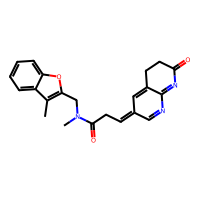
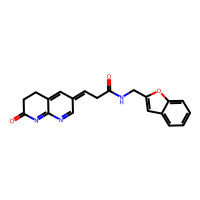
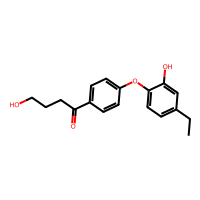
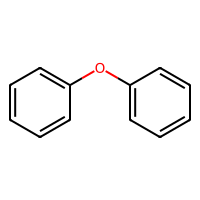
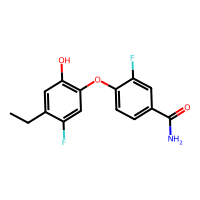
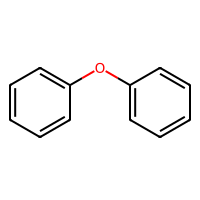
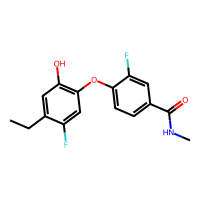
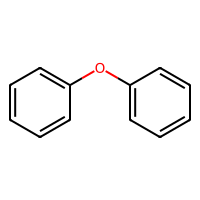
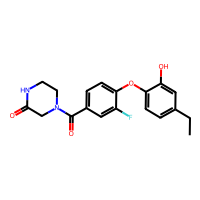
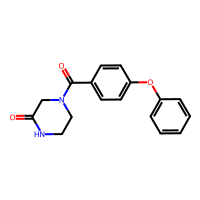
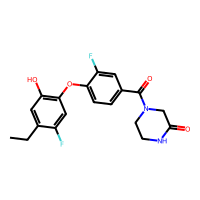
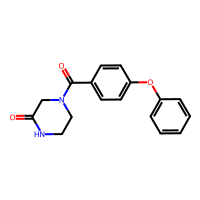
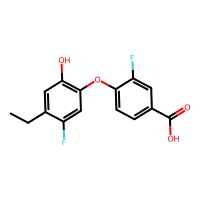
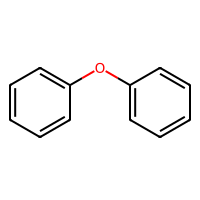
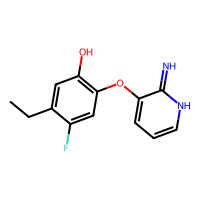
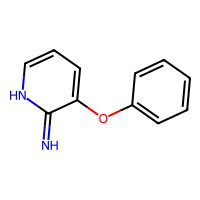
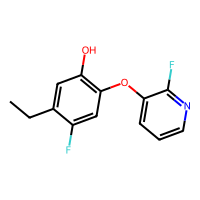
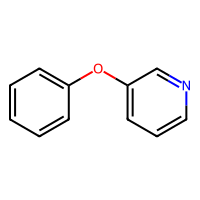
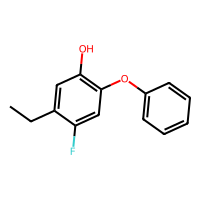
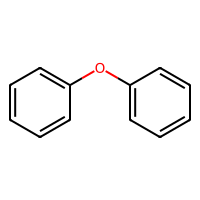

In [8]:
# Add a column with molecule objects derived from 'Murcko_SMILES' strings
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Murcko_SMILES", molCol='scaffold')

# Display the first 10 rows of the DataFrame to check the newly added 'scaffold' molecule column
df.head(10)

In [9]:
# Group data by 'Murcko_SMILES' to count occurrences of each scaffold
amount = df.groupby(['Murcko_SMILES']).size()
print(f"Dataset with {amount.shape[0]} different entries:", amount.sort_values(ascending=False))

# Create a new DataFrame with Murcko SMILES scaffolds and their counts, sorted in descending order
df_sca_all = pd.DataFrame(amount, columns=['Amount'])
df_sca_all = df_sca_all.sort_values(by='Amount', ascending=False)  # Sort by 'Amount' in descending order
df_sca_all = df_sca_all.reset_index(level=None, drop=False)  # Reset the index to make 'Murcko_SMILES' a column

# Print the shape and column names of the new DataFrame for verification
print('All:', df_sca_all.shape, df_sca_all.columns)

# Display the new DataFrame
df_sca_all


Dataset with 31 different entries: Murcko_SMILES
O=C(c1ccccc1)N1CCc2c(n(Cc3ccccc3)c3ccccc23)C1               8
c1ccc(Oc2ccccc2)cc1                                         7
O=c1cc(COc2ccccc2)[nH]cc1Oc1ccccc1                          4
O=C1CCc2cc(=CCC(=O)NCc3c[nH]c4ccccc34)cnc2=N1               4
O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1cc2ccccc2s1       3
O=C1CCc2cc(=CCC(=O)N3CCC(COc4ccccc4)CC3)cnc2=N1             3
O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1                        2
O=C1CCc2cc(=CCC(=O)N3CC(c4cc5ccccc5o4)C3)cnc2=N1            2
O=C1CCc2cc(=CCC(=O)N3CCC3)cnc2=N1                           2
O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1ccccc1            2
O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1cc2ccccc2o1       2
O=C1CCc2cc(=CCC(=O)N3CCCCC3)cnc2=N1                         1
O=C1CNCc2cc(=CCC(=O)N3CC(c4cc5ccccc5o4)C3)cnc2=N1           1
c1ccc(Cn2cnc(-c3ccsc3)c2)cc1                                1
c1ccc(OCC2CCNCC2)cc1                                        1
O=C1CCc2cc(=CCC(=O)NC

,Murcko_SMILES,Amount
0,O=C(c1ccccc1)N1CCc2c(n(Cc3ccccc3)c3ccccc23)C1,8
1,c1ccc(Oc2ccccc2)cc1,7
2,O=c1cc(COc2ccccc2)[nH]cc1Oc1ccccc1,4
3,O=C1CCc2cc(=CCC(=O)NCc3c[nH]c4ccccc34)cnc2=N1,4
4,O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1cc2c...,3
5,O=C1CCc2cc(=CCC(=O)N3CCC(COc4ccccc4)CC3)cnc2=N1,3
6,O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1,2
7,O=C1CCc2cc(=CCC(=O)N3CC(c4cc5ccccc5o4)C3)cnc2=N1,2
8,O=C1CCc2cc(=CCC(=O)N3CCC3)cnc2=N1,2
9,O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1ccccc1,2


In [10]:
# Check if the 'Murcko_SMILES' value at index 1 is NaN (not a number) or an empty string
if pd.isna(df_sca_all.at[1, 'Murcko_SMILES']) or df_sca_all.at[1, 'Murcko_SMILES'] == '':
    # If the value is NaN or empty, set it to 'Linear molecule'
    df_sca_all.at[1, 'Murcko_SMILES'] = 'Linear molecule'

In [11]:
# Reset the index of the DataFrame and remove the old index
df_sca_all.reset_index(drop=True, inplace=True)

# Add a new column 'Frecuency' calculated as the percentage of each scaffold's count over the total entries in the original DataFrame
df_sca_all["Frecuency"] = (df_sca_all['Amount'] / len(df)) * 100

# Print the total frequency, the sum of all entries, and the number of unique Murcko SMILES in the database
print(f"Total Frecuency in Database: {sum(df_sca_all['Frecuency'])}, different entries: {sum(df_sca_all['Amount'])}, different Murcko Smiles:",
      len(df_sca_all['Murcko_SMILES']))

# Reorder columns to display Murcko SMILES, Amount, and Frequency in the output DataFrame
df_sca_all = df_sca_all[['Murcko_SMILES', 'Amount', 'Frecuency']]

# Display the modified DataFrame
df_sca_all


Total Frecuency in Database: 100.0, different entries: 59, different Murcko Smiles: 31


,Murcko_SMILES,Amount,Frecuency
0,O=C(c1ccccc1)N1CCc2c(n(Cc3ccccc3)c3ccccc23)C1,8,13.559322
1,c1ccc(Oc2ccccc2)cc1,7,11.864407
2,O=c1cc(COc2ccccc2)[nH]cc1Oc1ccccc1,4,6.779661
3,O=C1CCc2cc(=CCC(=O)NCc3c[nH]c4ccccc34)cnc2=N1,4,6.779661
4,O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1cc2c...,3,5.084746
5,O=C1CCc2cc(=CCC(=O)N3CCC(COc4ccccc4)CC3)cnc2=N1,3,5.084746
6,O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1,2,3.389831
7,O=C1CCc2cc(=CCC(=O)N3CC(c4cc5ccccc5o4)C3)cnc2=N1,2,3.389831
8,O=C1CCc2cc(=CCC(=O)N3CCC3)cnc2=N1,2,3.389831
9,O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1ccccc1,2,3.389831


Empty cell


,Murcko_SMILES,Amount,Frecuency,ROMol
0,O=C(c1ccccc1)N1CCc2c(n(Cc3ccccc3)c3ccccc23)C1,8,13.559322,
1,c1ccc(Oc2ccccc2)cc1,7,11.864407,
2,O=c1cc(COc2ccccc2)[nH]cc1Oc1ccccc1,4,6.779661,
3,O=C1CCc2cc(=CCC(=O)NCc3c[nH]c4ccccc34)cnc2=N1,4,6.779661,
4,O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1cc2c...,3,5.084746,
5,O=C1CCc2cc(=CCC(=O)N3CCC(COc4ccccc4)CC3)cnc2=N1,3,5.084746,
6,O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1,2,3.389831,
7,O=C1CCc2cc(=CCC(=O)N3CC(c4cc5ccccc5o4)C3)cnc2=N1,2,3.389831,
8,O=C1CCc2cc(=CCC(=O)N3CCC3)cnc2=N1,2,3.389831,
9,O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1ccccc1,2,3.389831,

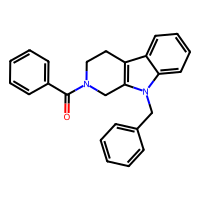
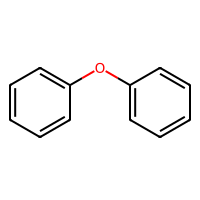
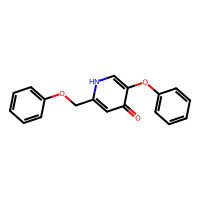
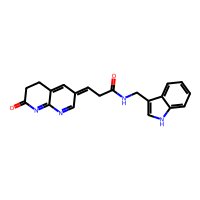
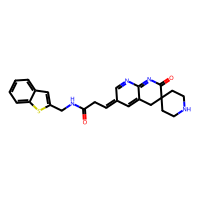
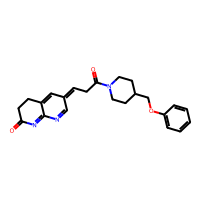
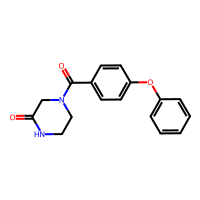
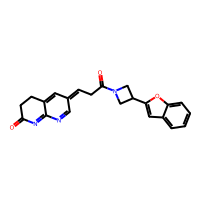
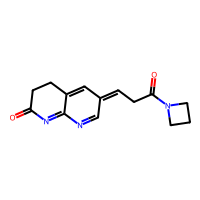
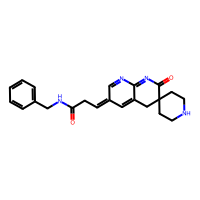
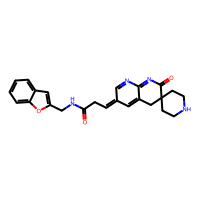
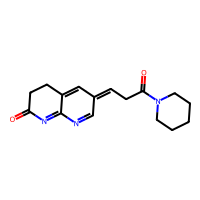
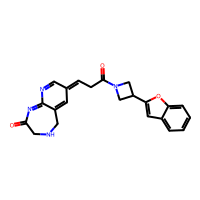
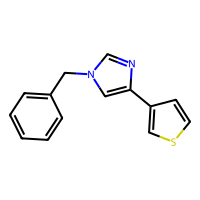
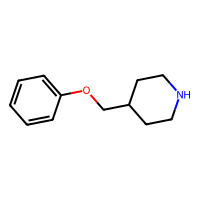
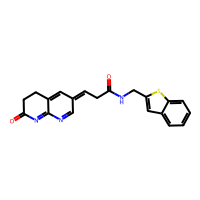
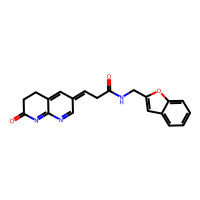
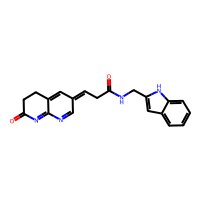
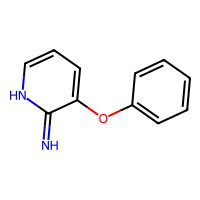
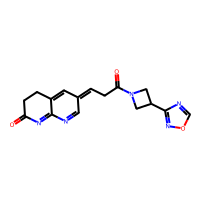
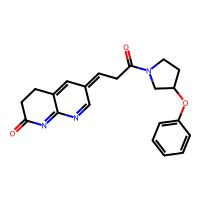
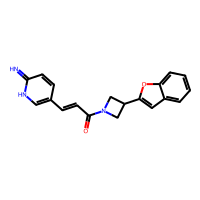
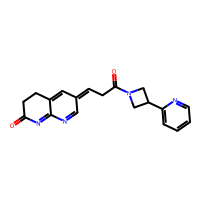
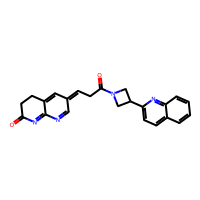
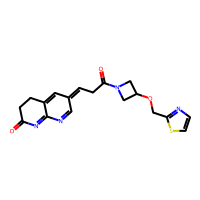
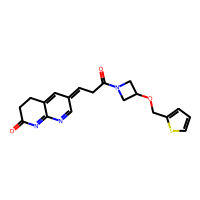
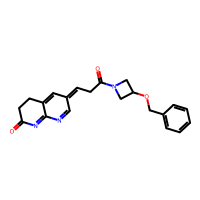
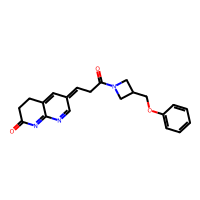
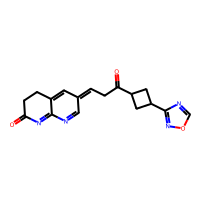
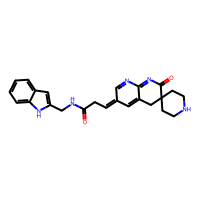
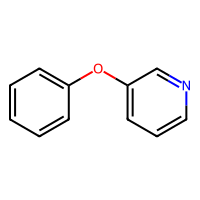

In [12]:
# Add a column to the DataFrame that converts 'Murcko_SMILES' strings into RDKit molecule objects
PandasTools.AddMoleculeColumnToFrame(df_sca_all, smilesCol='Murcko_SMILES')

# Display the first 32 rows of the DataFrame to inspect the newly added molecule objects
df_sca_all[0:32]


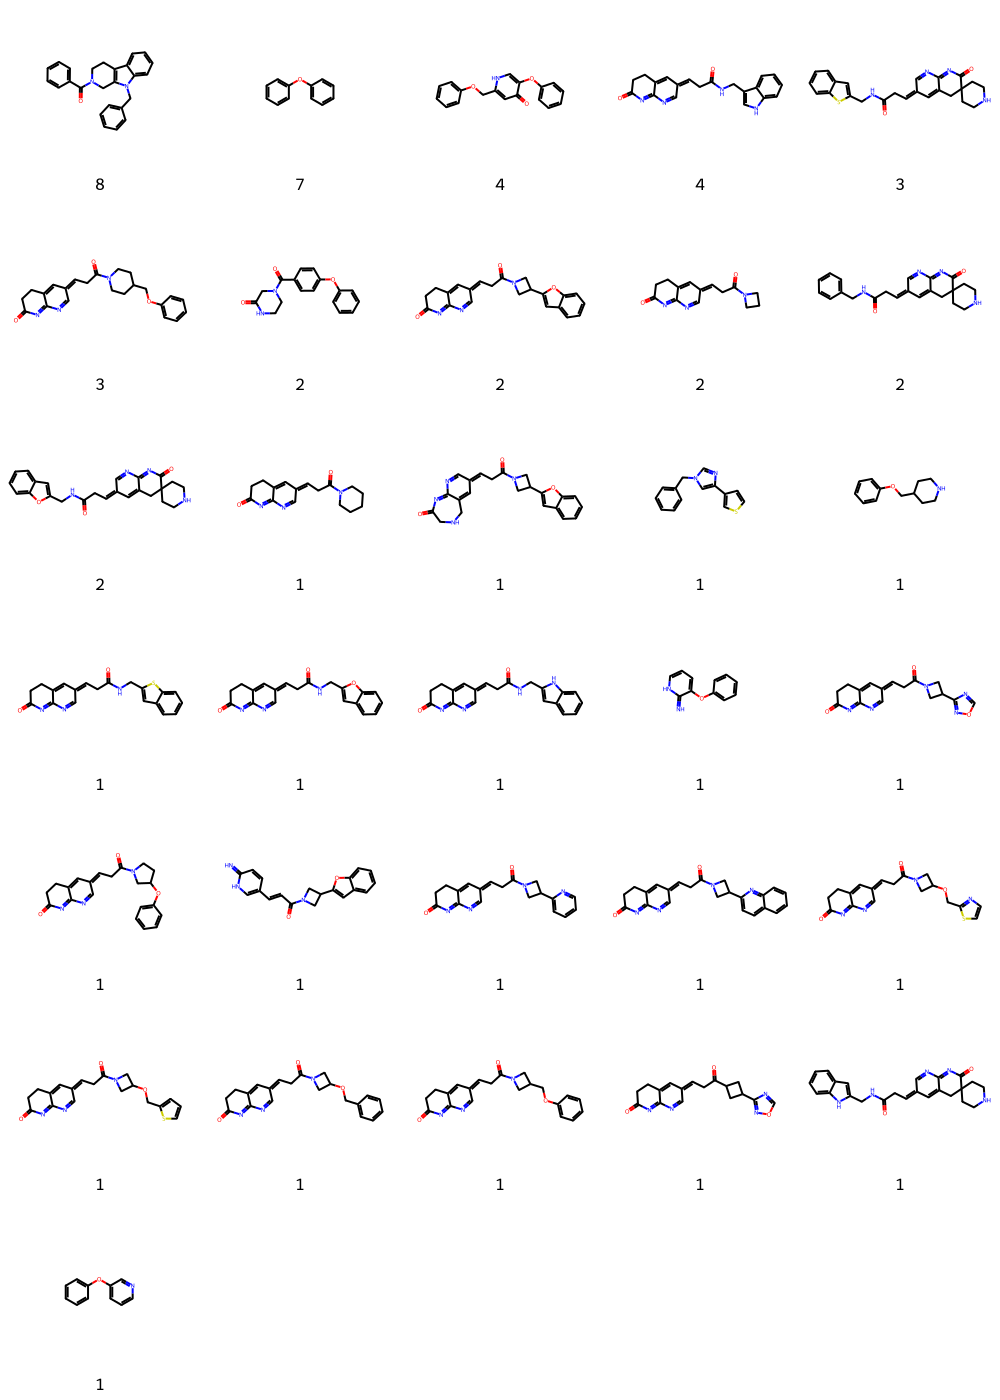

In [13]:
# Visualize scaffolds with their counts using a grid image
PandasTools.FrameToGridImage(df_sca_all[0:32], column='ROMol', legendsCol='Amount', molsPerRow=5)


In [14]:
# Add a column to the DataFrame that converts 'Murcko_SMILES' strings into RDKit molecule objects if not already done
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Murcko_SMILES", molCol='scaffold')

# Group by 'Murcko_SMILES' and aggregate 'pIC50' values into a list for each scaffold
scaffold_pIC50 = df.groupby('Murcko_SMILES')['pIC50'].apply(list).reset_index()

# Rename columns for clarity
scaffold_pIC50.columns = ['Murcko_SMILES', 'pIC50_List']

# Add a new column 'Frequency' that counts the number of entries for each scaffold
scaffold_pIC50['Frequency'] = scaffold_pIC50['pIC50_List'].apply(len)

# Sort the DataFrame by 'Frequency' in descending order and reset the index
scaffold_pIC50_sorted = scaffold_pIC50.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the first few entries of the sorted DataFrame to inspect the results
scaffold_pIC50_sorted


,Murcko_SMILES,pIC50_List,Frequency
0,O=C(c1ccccc1)N1CCc2c(n(Cc3ccccc3)c3ccccc23)C1,"[6.74472749489669, 6.79588001734407, 6.6197887...",8
1,c1ccc(Oc2ccccc2)cc1,"[7.31875876262441, 7.92081875395237, 7.0861861...",7
2,O=c1cc(COc2ccccc2)[nH]cc1Oc1ccccc1,"[6.92081875395237, 6.95860731484177, 7.0969100...",4
3,O=C1CCc2cc(=CCC(=O)NCc3c[nH]c4ccccc34)cnc2=N1,"[7.22184874961636, 6.88605664769316, 7.3010299...",4
4,O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1cc2c...,"[7.31875876262441, 7.85387196432176, 7.5528419...",3
5,O=C1CCc2cc(=CCC(=O)N3CCC(COc4ccccc4)CC3)cnc2=N1,"[7.22184874961636, 7.09151498112135, 7.1079053...",3
6,O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1,"[7.55284196865778, 7.79588001734407]",2
7,O=C1CCc2cc(=CCC(=O)N3CC(c4cc5ccccc5o4)C3)cnc2=N1,"[6.85078088734462, 6.6903698325741]",2
8,O=C1CCc2cc(=CCC(=O)N3CCC3)cnc2=N1,"[7.60205999132796, 6.76955107862173]",2
9,O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1ccccc1,"[7.14874165128093, 7.58502665202918]",2


,Murcko_SMILES,pIC50_List,ROMol,Frequency,pIC50_Mean,pIC50_StdDev
0,O=C(c1ccccc1)N1CCc2c(n(Cc3ccccc3)c3ccccc23)C1,"[6.74472749489669, 6.79588001734407, 6.6197887...",,8,6.772811,0.118131
1,c1ccc(Oc2ccccc2)cc1,"[7.31875876262441, 7.92081875395237, 7.0861861...",,7,7.443977,0.429397
2,O=c1cc(COc2ccccc2)[nH]cc1Oc1ccccc1,"[6.92081875395237, 6.95860731484177, 7.0969100...",,4,6.908478,0.158999
3,O=C1CCc2cc(=CCC(=O)NCc3c[nH]c4ccccc34)cnc2=N1,"[7.22184874961636, 6.88605664769316, 7.3010299...",,4,7.276976,0.289186
4,O=C(CC=c1cnc2c(c1)CC1(CCNCC1)C(=O)N=2)NCc1cc2c...,"[7.31875876262441, 7.85387196432176, 7.5528419...",,3,7.575158,0.219028
5,O=C1CCc2cc(=CCC(=O)N3CCC(COc4ccccc4)CC3)cnc2=N1,"[7.22184874961636, 7.09151498112135, 7.1079053...",,3,7.140423,0.057964
6,O=C1CN(C(=O)c2ccc(Oc3ccccc3)cc2)CCN1,"[7.55284196865778, 7.79588001734407]",,2,7.674361,0.121519
7,O=C1CCc2cc(=CCC(=O)N3CC(c4cc5ccccc5o4)C3)cnc2=N1,"[6.85078088734462, 6.6903698325741]",,2,6.770575,0.080206

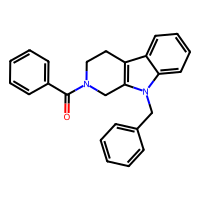
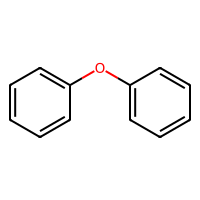
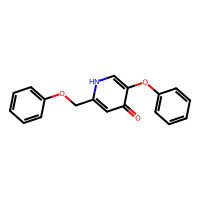
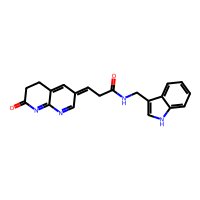
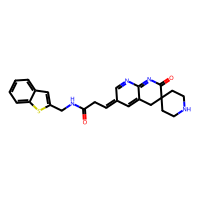
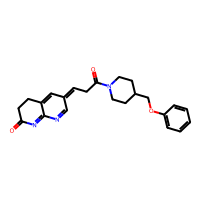
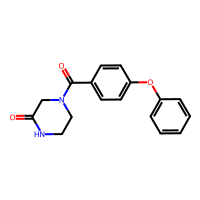
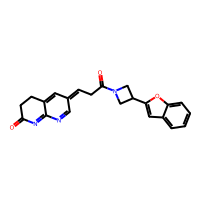

In [15]:
# Add a molecule column from 'Murcko_SMILES' strings if not already added
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Murcko_SMILES", molCol='scaffold')

# Group by 'Murcko_SMILES' and aggregate pIC50 values into a list, also keep the first ROMol object for each group
scaffold_pIC50 = df.groupby('Murcko_SMILES').agg(
    pIC50_List=('pIC50', list),
    ROMol=('scaffold', 'first')  # Take the first entry of ROMol corresponding to each scaffold
).reset_index()

# Count the frequency of each scaffold and add it to the DataFrame
scaffold_pIC50['Frequency'] = scaffold_pIC50['pIC50_List'].apply(len)

# Define a function to calculate the mean and standard deviation of pIC50 values
def calculate_stats(pIC50_list):
    if len(pIC50_list) == 1:  # Check if there is only one element in the list
        return "unique", "unique"
    else:
        return np.mean(pIC50_list), np.std(pIC50_list)

# Apply the function to each list of pIC50 values and store the results in new columns
scaffold_pIC50[['pIC50_Mean', 'pIC50_StdDev']] = scaffold_pIC50['pIC50_List'].apply(lambda x: pd.Series(calculate_stats(x)))

# Sort the DataFrame by frequency in descending order
scaffold_pIC50_sorted = scaffold_pIC50.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the first 8 records of the sorted DataFrame
scaffold_pIC50_sorted.head(8)
